In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
dataset

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]

In [5]:
X = dataset.iloc[:, 3:5].values

In [6]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [22]:
from sklearn.cluster import Birch
brc = Birch(n_clusters=None).fit(X)

# Retrieve the labels assigned to each data point
labels = brc.labels_

# Print the unique cluster labels
unique_labels = set(labels)
print("Unique cluster labels:", unique_labels)

# Determine the number of clusters found
num_clusters = len(unique_labels)
print("Number of clusters found:", num_clusters)

Unique cluster labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176}
Number of clusters found: 177


In [23]:
brc

Birch(n_clusters=None)

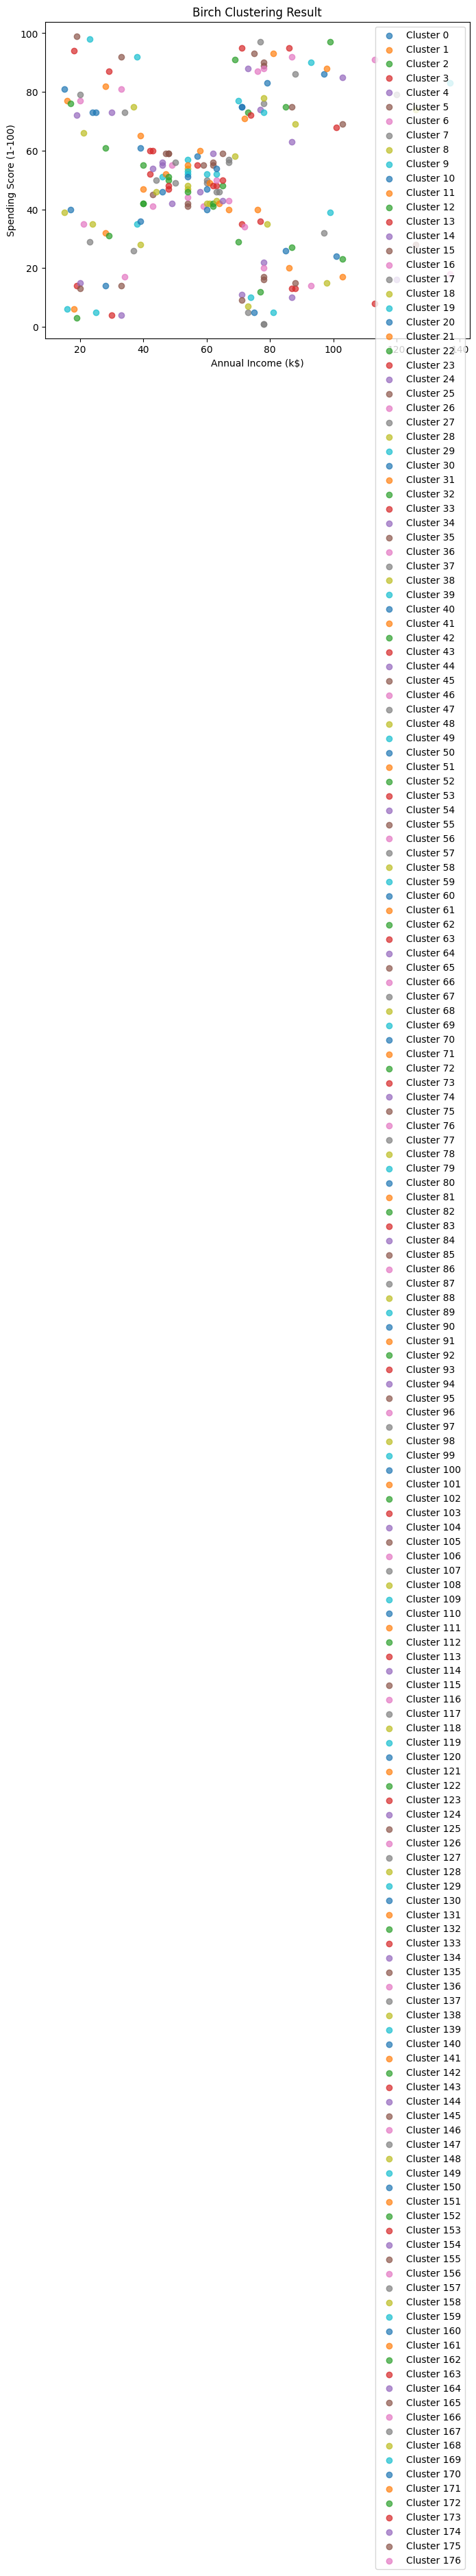

In [31]:
# Plot the data points with different colors for each cluster
plt.figure(figsize=(8, 6))
for label in set(labels):
    clustered_points = X[labels == label]
    plt.scatter(clustered_points[:, 0], clustered_points[:, 1], label=f'Cluster {label}', alpha=0.7)

plt.title('Birch Clustering Result')
plt.xlabel(dataset.columns[3])
plt.ylabel(dataset.columns[4])
plt.legend()
plt.show()


In [24]:
labels = brc.fit_predict(X)

# Create DataFrame from the synthetic data
supervised = pd.DataFrame(dataset)

# Add cluster labels to DataFrame
supervised['cluster_group'] = labels

In [25]:
supervised

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     cluster_group  
0               38  
1                0  
2               39  
3                1  
4               40  
..             ...  
195            137  
196            175  
197            138  
198            176  
199            139  

[200 rows x 6 columns]

In [26]:
num_clusters

177

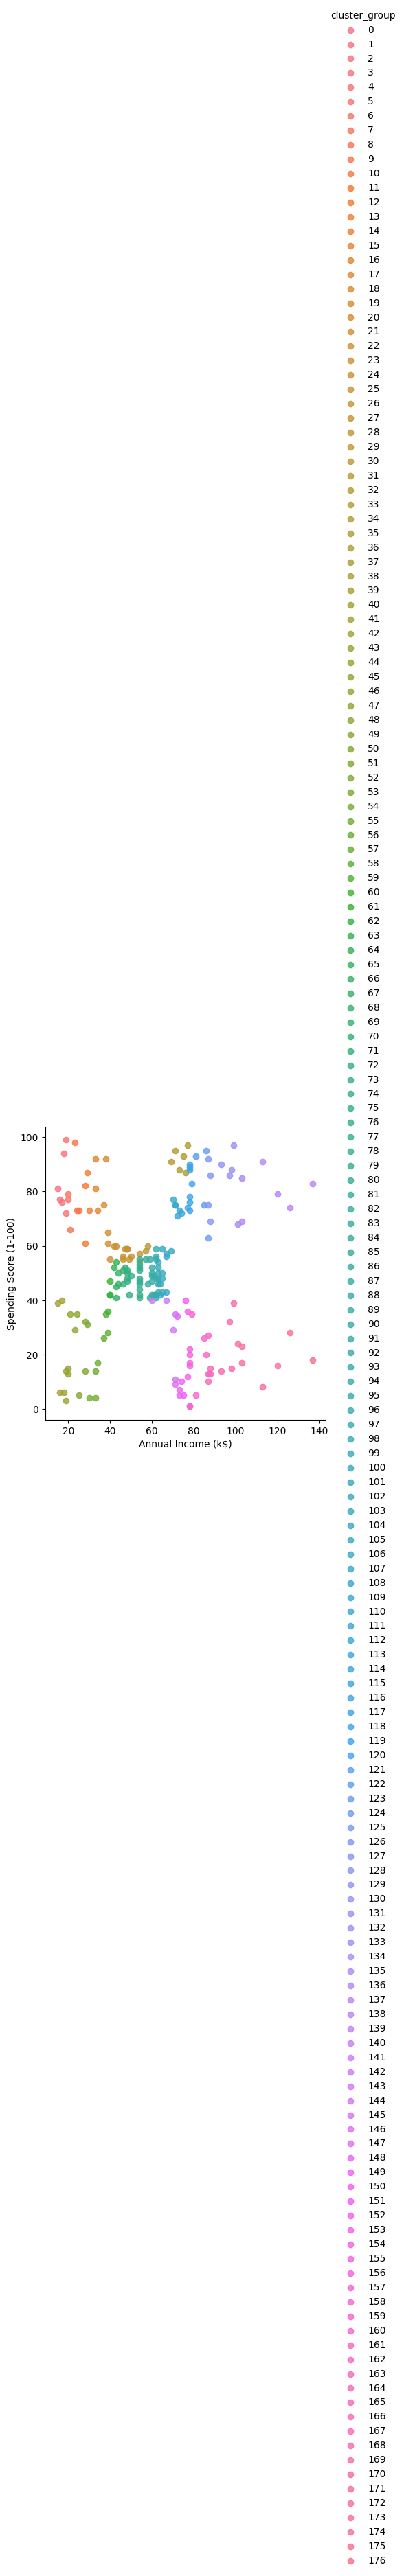

In [27]:
import seaborn as sns

sns.lmplot(
    data=supervised,
    x=supervised.columns[3],
    y=supervised.columns[4],
    hue=supervised.columns[5],
    fit_reg=False,
    facet_kws={'legend_out': True}  # Pass legend_out using facet_kws
)